# compare OnBeam BNB data to MC-BNB/DATA cosmic overlay 
This is done by fixing two factors:
1. area-normalizing the overlay to match the OnBeam data
2. reweighting the cosmic in the overlay, to match the OnBeam in the preselection stage

and then studying what happens to the OnBeam/overlay comparison after all cuts

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
pd.set_option('precision', 2)
%matplotlib inline

OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.507547428293 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/OnOffComparisonsPlayground/'

In [3]:
OnBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_bnb_v12_unblind_mcc8_04_2018_04_26_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_bnb_v12_unblind_mcc8_05_2018_04_26_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print_and_say("%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume')

OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_extbnb_v12_mcc8_dev_04_2018_04_')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco_optfilter_extbnb_v12_mcc8_dev_05_2018_04_26_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print_and_say("%d"%len(OffBeam)+' pairs from Off-Beam, %d'%len(OffBeamFV)+' in Fiducial Volume')


OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(filename='prodgenie_bnb_nu_uboone_overlay_mcc8_v4_2018_04_22_vertices')
print_and_say("%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay')

38199 pairs from On-Beam, 24345 in Fiducial Volume
34730 pairs from On-Beam, 21107 in Fiducial Volume
27468 pairs from MC-BNB + cosmic DATA overlay
18136 pairs in FV
5060 are 1mu-1p, 27.9%
4071 are other pairs, 22.4%
9005 are cosmic, 49.7%
--------------------------------------------------------------
2389 are CC 1p 0pi, 13.2%
9005 cosmic pairs and 5060 mu-p pairs in overlay


In [4]:
# cuts_pureff = apply_cuts_MCbnbDATAcosmic()
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,do_PIDaCali=True
                                                                   ,cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] )
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,27.9%,100.0%,13.2%,no cut,100.0% (5060),100.0% (4071),100.0% (9005),100.0% (2389)
PIDa,80.7%,57.7%,84.0%,28.3%,PIDa,80.7% (4084),45.3% (1845),12.7% (1147),84.0% (2006)
flash,76.3%,62.7%,78.8%,30.6%,flash,76.3% (3859),43.8% (1783),5.7% (510),78.8% (1882)
length,68.5%,71.0%,72.4%,35.4%,length,68.5% (3465),26.0% (1058),4.0% (360),72.4% (1729)
vertex activity,45.8%,73.2%,62.7%,47.3%,vertex activity,45.8% (2316),15.9% (648),2.2% (201),62.7% (1497)
delta phi,29.9%,84.7%,46.6%,62.3%,delta phi,29.9% (1513),4.0% (161),1.3% (113),46.6% (1114)
soft Pt,26.1%,90.2%,42.2%,68.9%,soft Pt,26.1% (1321),2.5% (103),0.4% (40),42.2% (1008)


# overlay subsamples-scaling

In [5]:
f_Cosmic=0.92
overlay_scalings = dict()
overlay_scalings['only POT'] = get_samples_scaling( N_total='MC(tot) x POT' # total integral of all overlay 
                                      , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                      , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['POT scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total='MC(tot) x POT'  # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                               , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                               , OverlaySubsamples=reducedOverlay['no cut'])
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                       
                                                                         , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                         , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 1.3423577415086017,
                         'CC 1p 0pi': 1.3423577415086017,
                         'cosmic': 1.3423577415086017,
                         'other pairs': 1.3423577415086017},
    'N(On) scaling and f(cosmic)=0.92': {   '1mu-1p': 0.21329536742963523,
                                            'CC 1p 0pi': 0.2132953674296352,
                                            'cosmic': 2.4872182121043864,
                                            'other pairs': 0.21329536742963523},
    'POT scaling and f(cosmic)=0.92': {   '1mu-1p': 0.08064729085117367,
                                          'CC 1p 0pi': 0.08064729085117367,
                                          'cosmic': 0.94042084916865887,
                                          'other pairs': 0.080647290851173656},
    'only POT': {   '1mu-1p': 0.50754742829321997,
                    'CC 1p 0pi': 0.50754742829322008,
                    'cosmic': 0.50754742

## $l_\mu - l_p$

In [6]:
# To erase after running on overlay v9 and beamOn/Off data!
OnBeamFV['l_muCandidate'] = OnBeamFV['l_assigned_muon']
OffBeamFV['l_muCandidate'] = OffBeamFV['l_assigned_muon']
OnBeamFV['l_pCandidate'] = OnBeamFV['l_assigned_proton']
OffBeamFV['l_pCandidate'] = OffBeamFV['l_assigned_proton']

OnBeamFV['pidcali_PIDaYplane_pCandidate'] = OnBeamFV['PIDa_assigned_proton']
OnBeamFV['pidcali_PIDaYplane_muCandidate'] = OnBeamFV['PIDa_assigned_muon']
OffBeamFV['pidcali_PIDaYplane_pCandidate'] = OffBeamFV['PIDa_assigned_proton']
OffBeamFV['pidcali_PIDaYplane_muCandidate'] = OffBeamFV['PIDa_assigned_muon']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [7]:
# To erase after running on overlay v9 and beamOn/Off data!
OnBeamFV['l_mu-l_p'] = OnBeamFV['l_muCandidate'] - OnBeamFV['l_pCandidate']
OffBeamFV['l_mu-l_p'] = OffBeamFV['l_muCandidate'] - OffBeamFV['l_pCandidate']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
# To erase after running on overlay v9 and beamOn/Off data!
for pair_type in pair_types:
    MCbnbDATAcosmicSamples[pair_type]['l_mu-l_p'] = (MCbnbDATAcosmicSamples[pair_type]['l_muCandidate'] 
                                                     - MCbnbDATAcosmicSamples[pair_type]['l_pCandidate'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
cuts_order  = ['no cut','PIDa','flash','non-collinearity','vertex activity','delta phi','soft Pt'] 
cuts_labels = ['preselection','PIDa cut','PMT cuts','collinearity cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] 

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24283 ,sum of h_stack: 24286.0042423
detection + kinematical cuts : sum of h_OnBeam: 326 ,sum of h_stack: 352.341847651


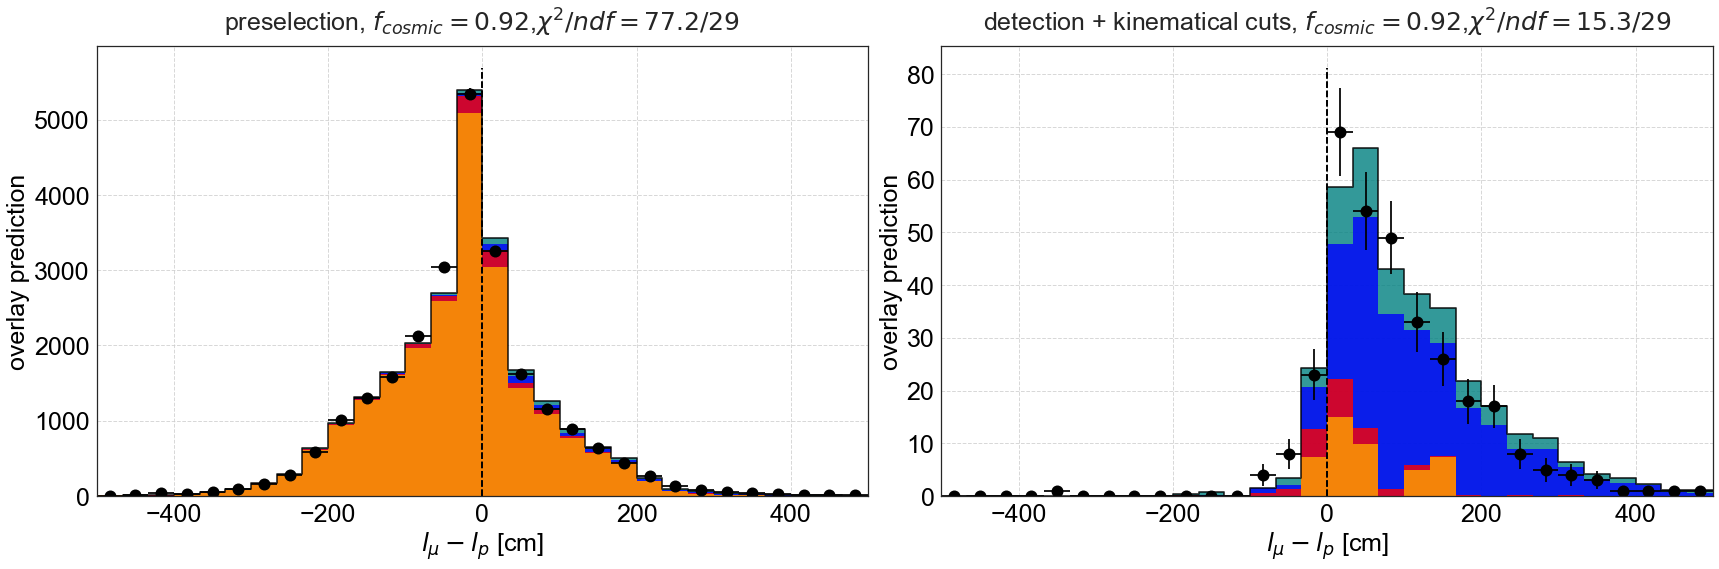

In [12]:
plot_nocut_finalcut(var='l_mu-l_p',x_label= r'$l_{\mu}-l_p$ [cm]',bins=linspace(-500,500,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'        
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(-500,500),chi2_xrange=(-200,500),debug=2,x_varcut=(0,0)
                   )

## collinearity

In [15]:
cuts_order  = ['no cut','PIDa','flash','length','vertex activity','delta phi','soft Pt'] 
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut'] 

reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


preselection : sum of h_OnBeam: 24345 ,sum of h_stack: 24345.0
detection + kinematical cuts : sum of h_OnBeam: 341 ,sum of h_stack: 403.221331704


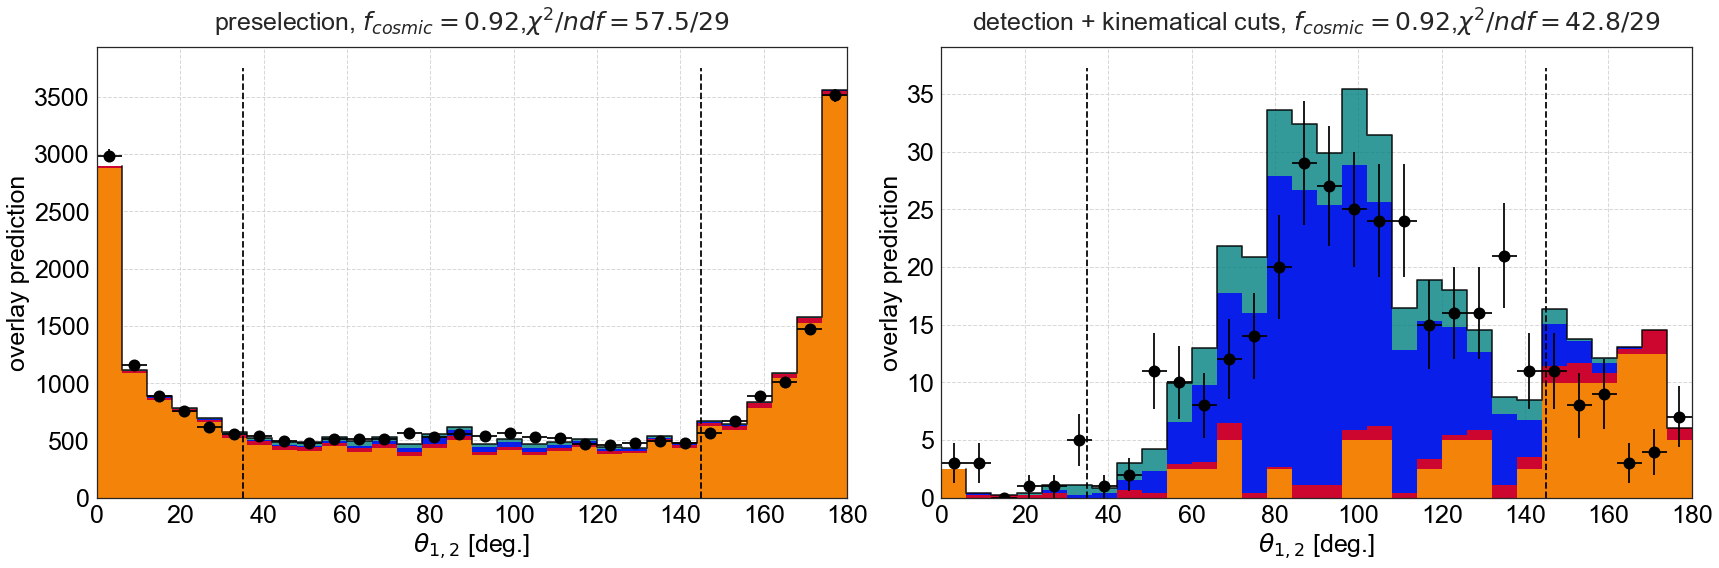

In [16]:
plot_nocut_finalcut(var='theta_12',x_label= r'$\theta_{1,2}$ [deg.]',bins=linspace(0,180,31)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic,xlim=(0,180),chi2_xrange=(0,180),debug=2,x_varcut=(35,145)
                   )

## $\Delta \phi$

In [17]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','vertex activity','soft Pt']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


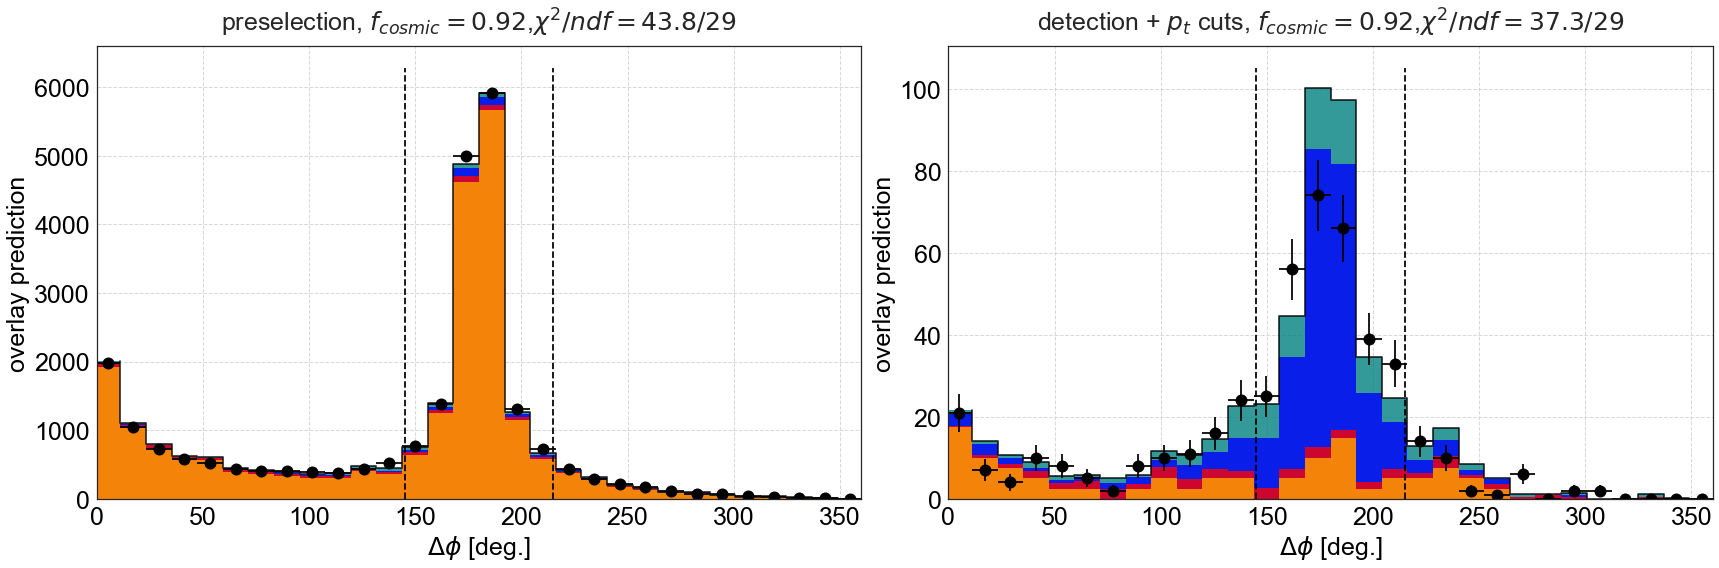

In [18]:
plot_nocut_finalcut(var='delta_phi',x_label=  r'$\Delta \phi$ [deg.]',bins=linspace(-1,361,31),x_varcut=(145,215)
                    ,last_cut_name='soft Pt',last_cut_label='detection + $p_t$ cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,360),chi2_xrange=(0,360)
                   )

## number of PE in closest flash

In [19]:
cuts_order  = ['no cut','PIDa','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PIDa cut',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


In [23]:
OverlaySamples_noFlash = dict()
for pair_type in pair_types:
    OverlaySamples_noFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']<0]
    
reducedOverlay_noFlash,pureffOverlay_noFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_noFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for no-flash'

OnBeamFV_noFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']<0]
OffBeamFV_noFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']<0]
reducedOnBeam_noFlash,reducedOffBeam_noFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_noFlash
                                                    ,OffBeamFV=OffBeamFV_noFlash,cuts_order=cuts_order)
print 'done applying cuts to data for no-flash'


OverlaySamples_withFlash = dict()
for pair_type in pair_types:
    OverlaySamples_withFlash[pair_type] = OverlaySamples[pair_type][OverlaySamples[pair_type]['ClosestFlash_TotalPE']>=0]
    
reducedOverlay_withFlash,pureffOverlay_withFlash,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_withFlash,cuts_order=cuts_order)
print 'done applying cuts to overlay for with-flashes'

OnBeamFV_withFlash = OnBeamFV[OnBeamFV['ClosestFlash_TotalPE']>=0]
OffBeamFV_withFlash = OffBeamFV[OffBeamFV['ClosestFlash_TotalPE']>=0]
reducedOnBeam_withFlash,reducedOffBeam_withFlash,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV_withFlash
                                                    ,OffBeamFV=OffBeamFV_withFlash,cuts_order=cuts_order)
print 'done applying cuts to data for with-flashes'

done applying cuts to overlay for no-flash
done applying cuts to data for no-flash
done applying cuts to overlay for with-flashes
done applying cuts to data for with-flashes


preselection : sum of h_OnBeam: 20935 ,sum of h_stack: 15993.1944774
detection + kinematical cuts : sum of h_OnBeam: 320 ,sum of h_stack: 334.21174142
preselection : sum of h_OnBeam: 2844 ,sum of h_stack: 6907.64854434
detection + kinematical cuts : sum of h_OnBeam: 4 ,sum of h_stack: 10.5887589507


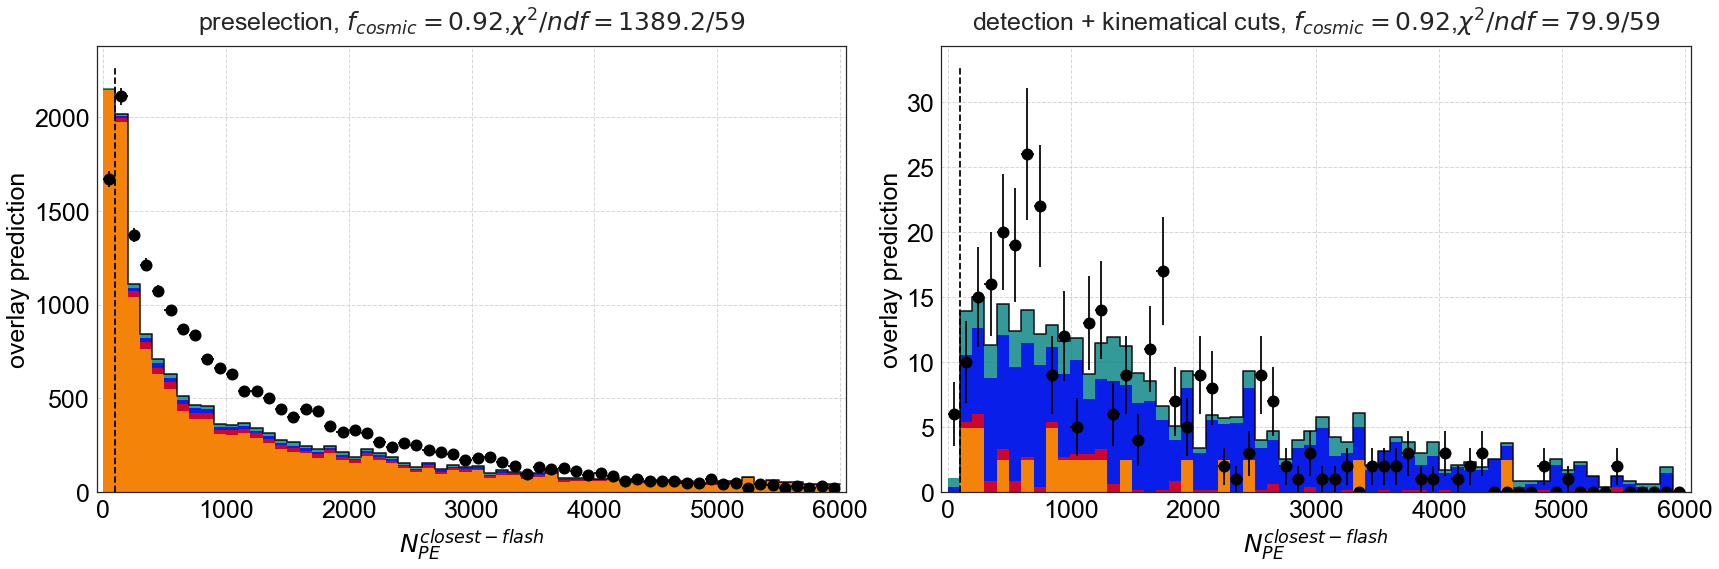

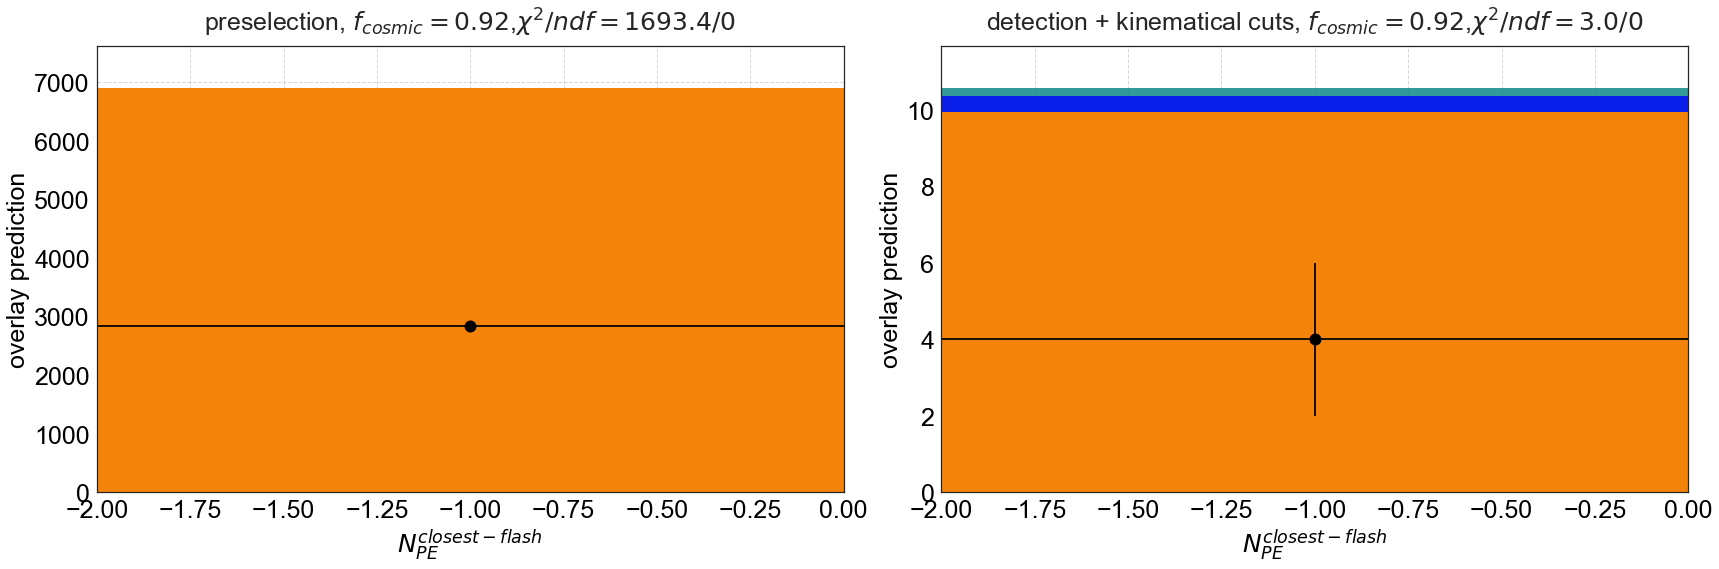

In [24]:
plot_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-1,6000,61)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam_withFlash
                    ,reducedOnBeam=reducedOnBeam_withFlash
                    ,reducedOverlay=reducedOverlay_withFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
#                     ,xlim=(0,4500)
                    ,chi2_xrange=(0,4500)
                    ,debug=2
                   )

plot_nocut_finalcut(var='ClosestFlash_TotalPE',x_label=  r'$N_{PE}^{closest-flash}$',bins=linspace(-2,0,2)
                    ,x_varcut=(100,np.inf)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam_noFlash
                    ,reducedOnBeam=reducedOnBeam_noFlash
                    ,reducedOverlay=reducedOverlay_noFlash
                    ,f_Cosmic=f_Cosmic,x_ticks = [0,500,1000,1500]
                    ,chi2_xrange=(-2,0),xlim=(-2,0)
                    ,debug=2
                   )

## $p_t$

In [25]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','vertex activity','delta phi']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


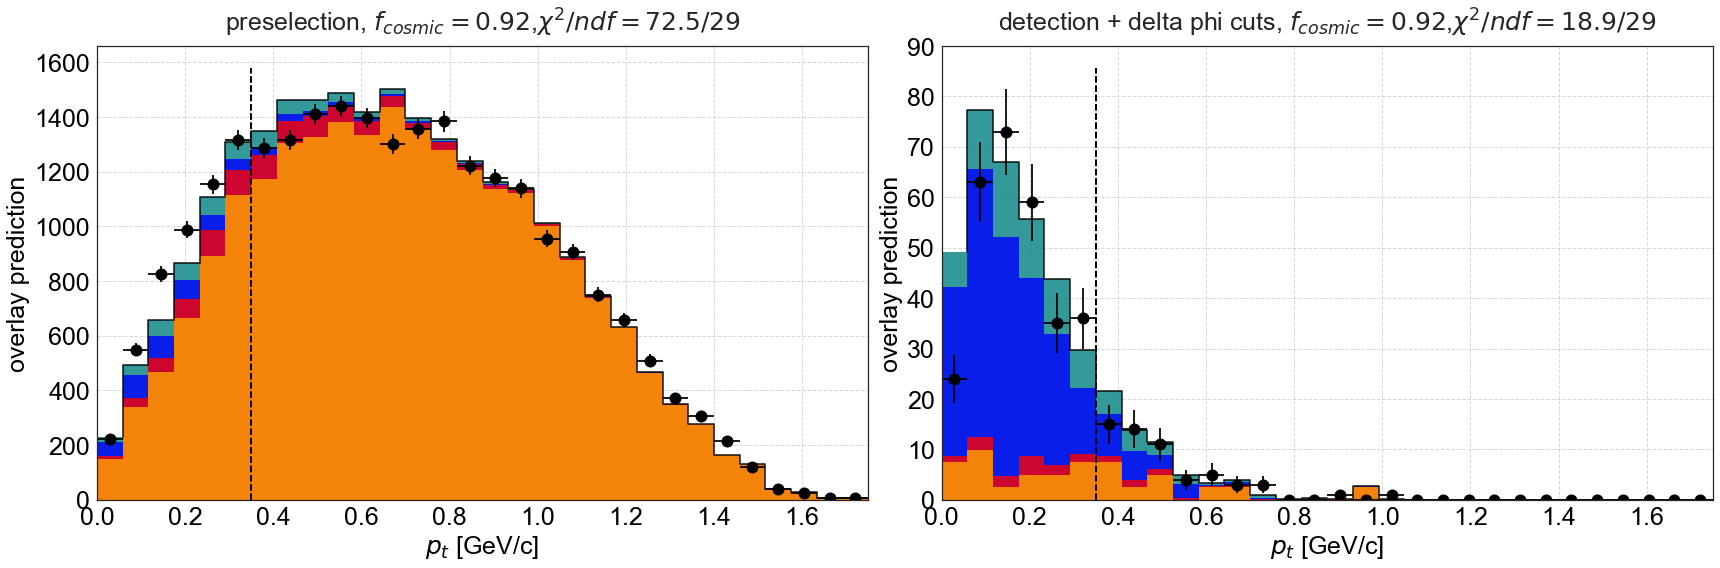

In [26]:
plot_nocut_finalcut(var='reco_Pt',x_label=  r'$p_{t}$ [GeV/c]',bins=linspace(0,1.75,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='delta phi',last_cut_label='detection + delta phi cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.75),chi2_xrange=(0,1)
                   )

## vertex activity

In [32]:
cuts_order  = ['no cut','PIDa','flash','length','non-collinearity','delta phi','soft Pt']
cuts_labels = ['preselection','PIDa cut','PMT cuts',r'$l_\mu > l_p$ cut','collinearity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order,do_PIDaCali=do_PIDaCali)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order,do_PIDaCali=do_PIDaCali)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


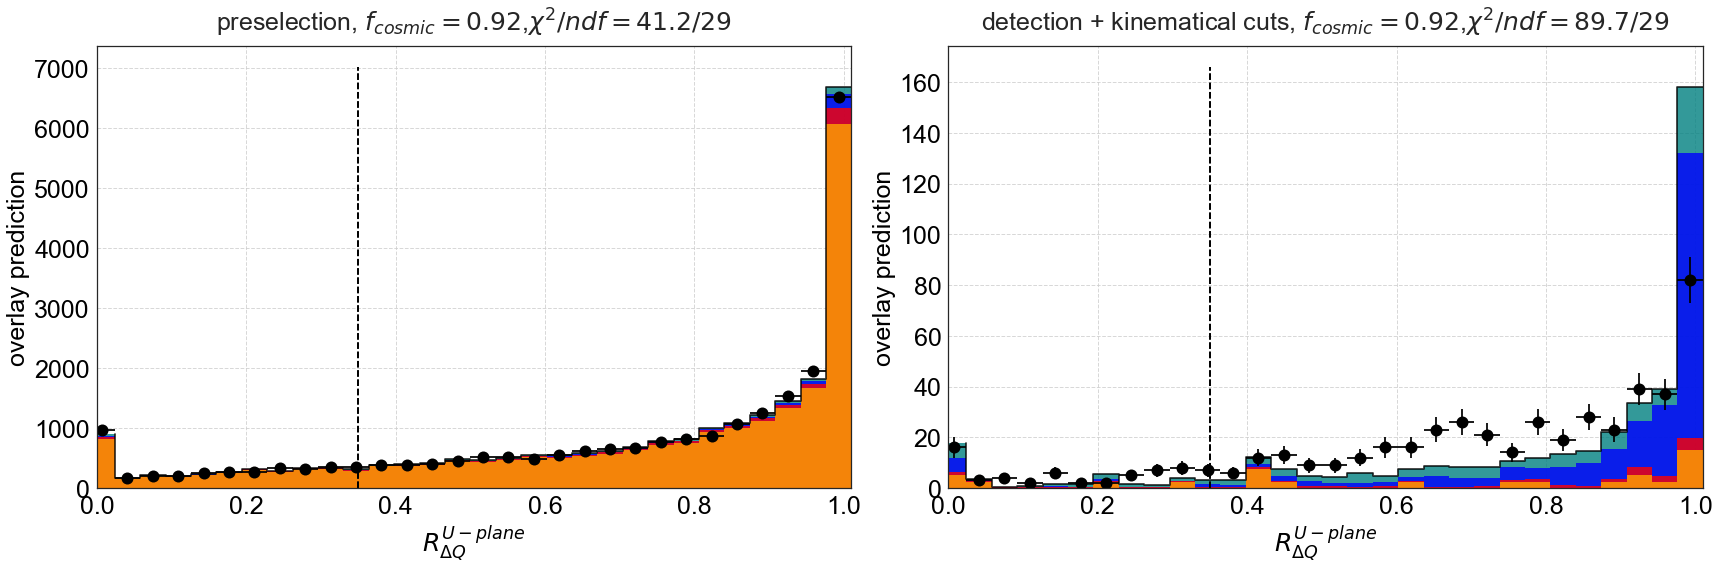

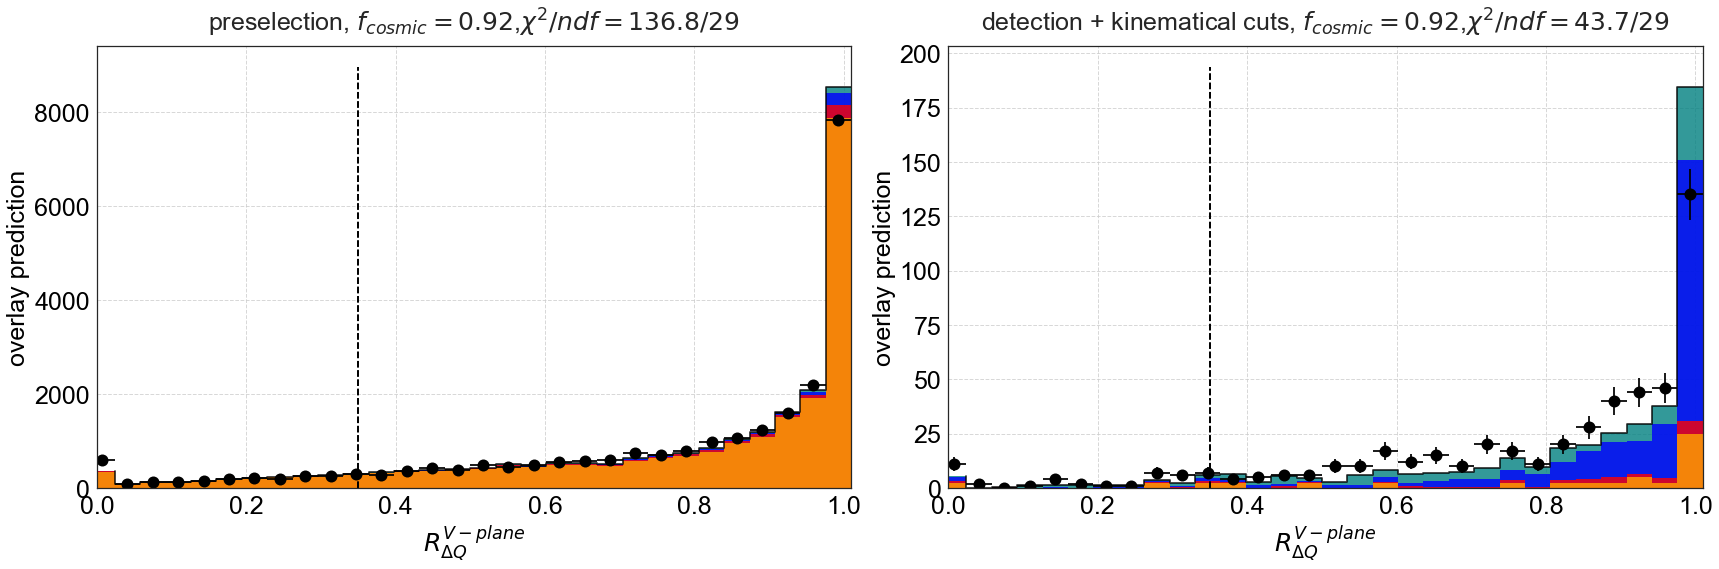

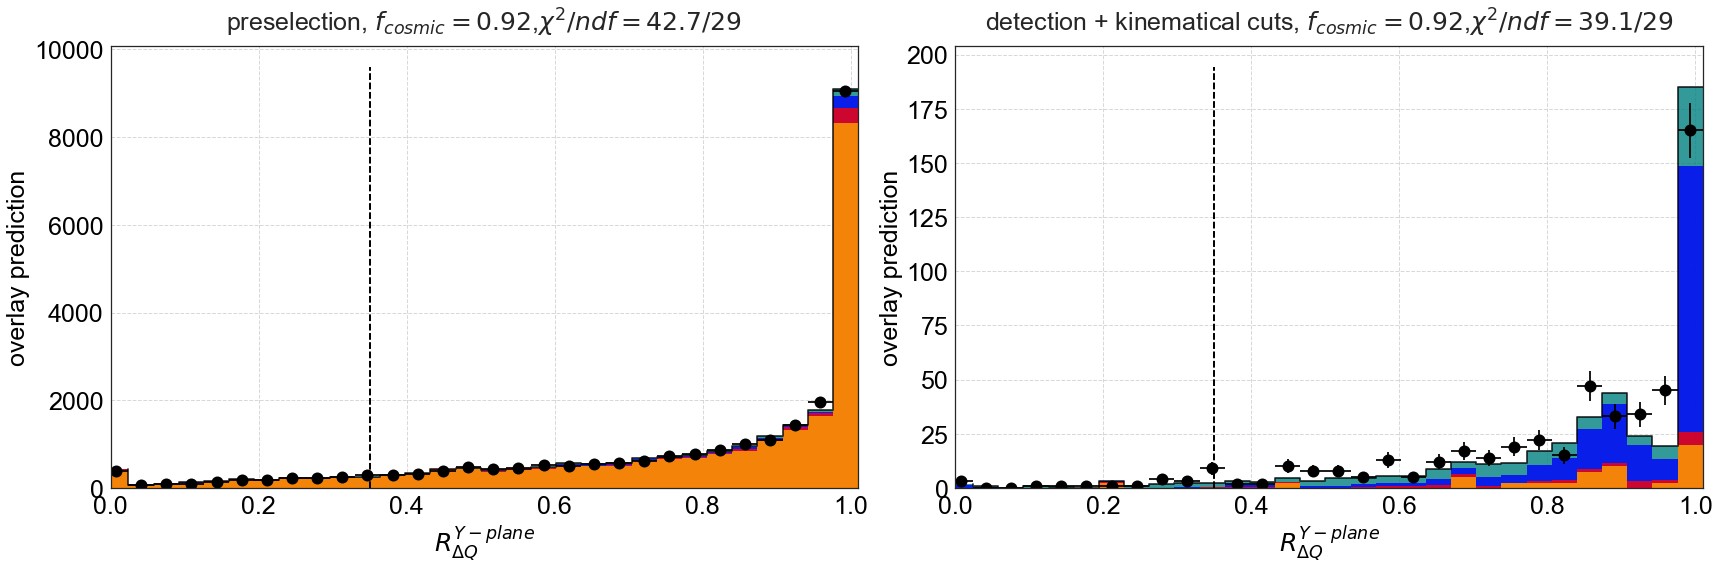

In [33]:
plot_nocut_finalcut(var='RdQaroundVertex[plane 0][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{U-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

plot_nocut_finalcut(var='RdQaroundVertex[plane 1][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{V-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

plot_nocut_finalcut(var='RdQaroundVertex[plane 2][50 wires x 100 ticks]',x_label=  r'$R_{\Delta Q}^{Y-plane}$'
                    ,bins=linspace(-0.01,1.01,31),x_varcut=(0.35,0.35)
                    ,last_cut_name='soft Pt',last_cut_label='detection + kinematical cuts'
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,1.01),chi2_xrange=(0,1)
                   )

## PIDa

In [28]:
do_PIDaCali = True
cuts_order  = ['no cut','flash','length','non-collinearity','vertex activity','delta phi','soft Pt']
cuts_labels = ['preselection','PMT cuts',r'$l_\mu > l_p$ cut','collinearity','vertex activity', r'$\Delta \phi$ cut',r'$p_t$ cut']
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
print 'done applying cuts to overlay'
reducedOnBeam,reducedOffBeam,_ = apply_cuts_to_data(OnBeamFV=OnBeamFV,OffBeamFV=OffBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'

done applying cuts to overlay
done applying cuts to data


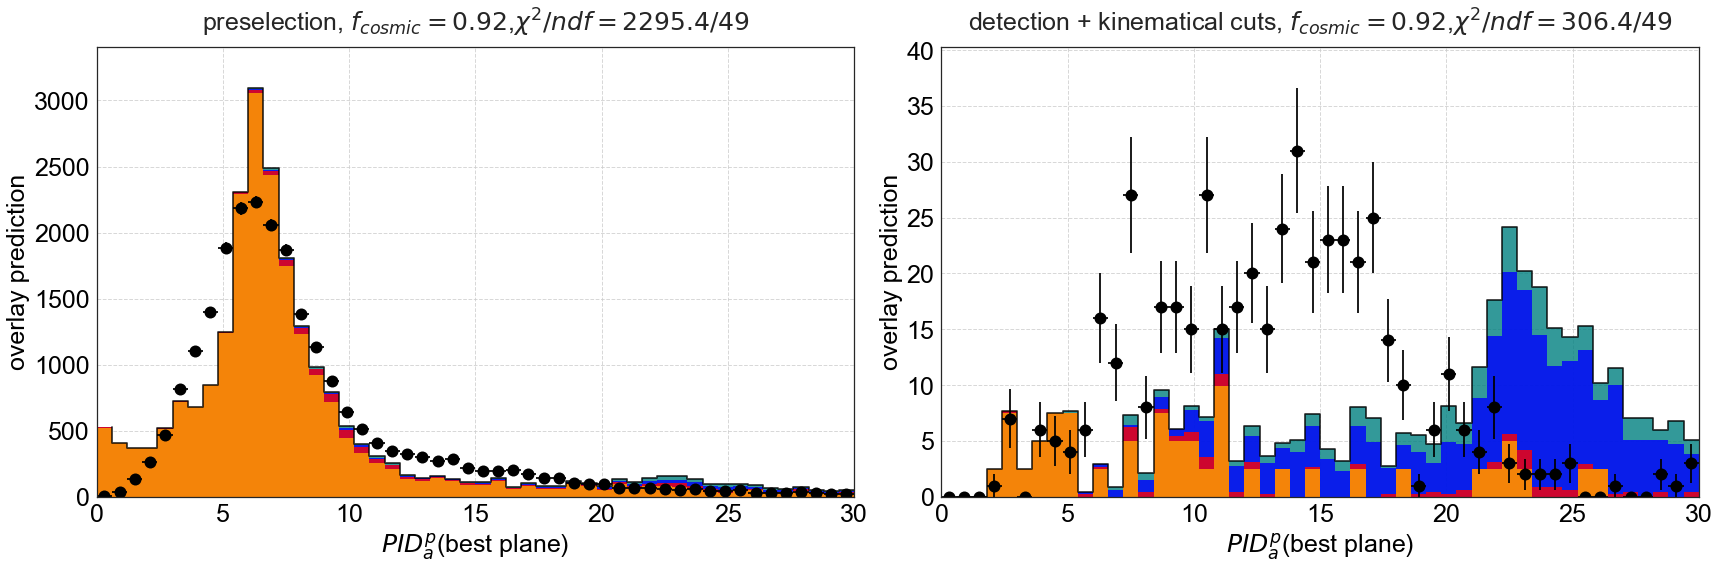

In [31]:
plot_nocut_finalcut(var='pidcali_PIDaYplane_pCandidate',x_label= r'$PID_{a}^{p}$(best plane)',bins=linspace(0,30,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,30),chi2_xrange=(5,30)
                   )

# Additional PIDa options: uncalibrated, best plane, etc.

In [ ]:
plot_nocut_finalcut(var='PIDaCali_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='PIDaCaliYplane_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='pandoraNucalipidCaliYplane_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='pandoraNupidCaliYplane_assigned_proton',x_label= r'$PID_{a}^{p}$ (Y-plane)',bins=linspace(0,40,51)
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )

In [ ]:
plot_nocut_finalcut(var='PIDaCali_assigned_proton',x_label= r'calibrated $PID_{a}^{p}$ (Best plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/PIDaCali_OnBeam_vs_Overlay.pdf')

In [ ]:
var='PIDaCaliYplane_assigned_proton'
plot_nocut_finalcut(var=var,x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/'+var+'_OnBeam_vs_Overlay.pdf')

In [ ]:
var='pandoraNucalipidCaliYplane_assigned_proton'
plot_nocut_finalcut(var=var,x_label= r'calibrated $PID_{a}^{p}$ (Y-plane)'
                    ,bins=linspace(0,40,51),x_varcut=(13,25),figsize=(12,8)
                    ,do_only_preselection=True
                    ,overlay_scalings=overlay_scalings
                    ,scaling_name='N(On) scaling and f(cosmic)=0.92'                    
                    ,reducedOffBeam=reducedOffBeam,reducedOnBeam=reducedOnBeam,reducedOverlay=reducedOverlay
                    ,f_Cosmic=f_Cosmic
                    ,xlim=(0,40),chi2_xrange=(10,40)
                   )
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/'+var+'_OnBeam_vs_Overlay.pdf')